In [20]:
#import pandas library

import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df

df = pd.read_csv('Fake_Real_Data.csv')

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [21]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [22]:
#check the distribution of labels 

# managing imbalanced data using under smapling
balance_data = 4900
Fake = df[df['label'] == 'Fake'].sample(balance_data)
Real = df[df['label'] == 'Real'].sample(balance_data)

df_balanced = pd.concat([Fake,Real],axis=0)

In [23]:
df_balanced.head()

,Text,label
3490,Racist Swarm Fox News In Response To Protests...,Fake
1241,Biden DESTROYS Trump After He Insults Veteran...,Fake
5478,"White House Gives Up Trying To Control Trump,...",Fake
6912,GOP Rep’s Defense Of Jeff Sessions Is Straigh...,Fake
2359,Pro-Trump Group Is Now Using Pictures Of An O...,Fake


In [24]:
df_balanced.label.value_counts()

label
Fake    4900
Real    4900
Name: count, dtype: int64

In [25]:
#Add the new column "label_num" which gives a unique number to each of these labels 


df_balanced['label_num'] = df_balanced.label.apply(lambda x: 1 if x == 'Fake' else 0)

In [26]:
#check the results with top 5 rows
df_balanced.head()

,Text,label,label_num
3490,Racist Swarm Fox News In Response To Protests...,Fake,1
1241,Biden DESTROYS Trump After He Insults Veteran...,Fake,1
5478,"White House Gives Up Trying To Control Trump,...",Fake,1
6912,GOP Rep’s Defense Of Jeff Sessions Is Straigh...,Fake,1
2359,Pro-Trump Group Is Now Using Pictures Of An O...,Fake,1


In [27]:
df_balanced.label_num.value_counts()

label_num
1    4900
0    4900
Name: count, dtype: int64

In [28]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split

X = df_balanced.Text
y = df_balanced.label_num
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [29]:

#print the shapes of X_train and X_test

X_train.shape, X_test.shape

((7840,), (1960,))

# 
Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Da

# Note:

using CountVectorizer with unigram, bigram, and trigrams.
use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
print the classification report.ta.

In [30]:
#1. create a pipeline object
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

clf =  Pipeline([
    ('vectorizer' , CountVectorizer(ngram_range=(2,3))),
    ('KNN', KNeighborsClassifier(n_neighbors= 10, metric='euclidean'))
])

In [31]:
#2. fit with X_train and y_train
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(2, 3))),
                ('KNN',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [32]:
#3. get the predictions for X_test and store it in y_pred
prediction = clf.predict(X_test)

In [33]:
#4. print the classfication report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       986
           1       1.00      0.00      0.00       974

    accuracy                           0.50      1960
   macro avg       0.75      0.50      0.34      1960
weighted avg       0.75      0.50      0.34      1960



# 
Attempt 2 :n report

# Attempt 2 :
using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note
using CountVectorizer with unigram, bigram, and trigrams.
use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
print the classification report.

In [34]:
# 1. create a pipeline object

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

clf =  Pipeline([
    ('vectorizer' , CountVectorizer(ngram_range=(2,3))),
    ('KNN', KNeighborsClassifier(n_neighbors= 10, metric='cosine'))
])

#2. fit with X_train and y_train
clf.fit(X_train,y_train)


#3. get the predictions for X_test and store it in y_pred

prediction2 = clf.predict(X_test)

#4. print the classfication report

print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       986
           1       0.99      0.73      0.84       974

    accuracy                           0.86      1960
   macro avg       0.89      0.86      0.86      1960
weighted avg       0.89      0.86      0.86      1960



# Attempt 3
:

using the sklearn pipeline module create a classification pipeline to classify the D

# Note
using CountVectorizer with only trigrams.
use RandomForest as the classifier.
print the classification report.ata

In [35]:
#1. create a pipeline object

from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(0,3))),
    ('Rm', RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred

prediction3 = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       986
           1       0.99      1.00      0.99       974

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



# Attempt 4:
using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note:
using CountVectorizer with both unigram and bigrams.

use Multinomial Naive Bayes as the classifier with an alpha value of 0.7

.
print the classification report.

In [36]:
from sklearn.naive_bayes import MultinomialNB

#1. create a pipeline object

clf = Pipeline([
    ('Vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('Mult', MultinomialNB(alpha=0.7))
])


#2. fit with X_train and y_train

clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred

prediction4 = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       986
           1       0.98      0.99      0.98       974

    accuracy                           0.98      1960
   macro avg       0.98      0.98      0.98      1960
weighted avg       0.98      0.98      0.98      1960



# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [37]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [38]:

# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient

df_balanced['preprocessed_txt'] = df_balanced.Text.apply(preprocess)

In [39]:
#print the top 5 rows
df_balanced.head()

,Text,label,label_num,preprocessed_txt
3490,Racist Swarm Fox News In Response To Protests...,Fake,1,Racist Swarm Fox News response Protests Char...
1241,Biden DESTROYS Trump After He Insults Veteran...,Fake,1,Biden destroys Trump insult Veterans VIDEO D...
5478,"White House Gives Up Trying To Control Trump,...",Fake,1,White House give try Control Trump lawyer re...
6912,GOP Rep’s Defense Of Jeff Sessions Is Straigh...,Fake,1,GOP Rep Defense Jeff Sessions straight KKK A...
2359,Pro-Trump Group Is Now Using Pictures Of An O...,Fake,1,Pro Trump Group picture Obama Rally Trump lo...


# Let's check the scores with our best model till now
Random forest

# Attempt 1

using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note

using CountVectorizer with only trigrams.

use RandomForest as the classifier.

print the classification report.

In [43]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(0,3))),
    ('Rm', RandomForestClassifier())
])

#2. fit with X_train and y_train

clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred

prediction3 = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       986
           1       0.99      1.00      1.00       974

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



# Attempt 2:

using the sklearn pipeline module create a classification pipeline to classify the Data.

# Note: 
using CountVectorizer with unigram, Bigram, and trigrams.
use RandomForest as the classifier.
print the classification report.

In [45]:

#1. create a pipeline object

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('rm', RandomForestClassifier())
])


#2. fit with X_train and y_train

clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
prediction6 = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       986
           1       0.99      1.00      1.00       974

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



In [46]:
# after preprocessing of text random forest gives best accuray with or without ngram..

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction6)
cm

array([[979,   7],
       [  1, 973]], dtype=int64)

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(95.72222222222221, 0.5, 'truth')

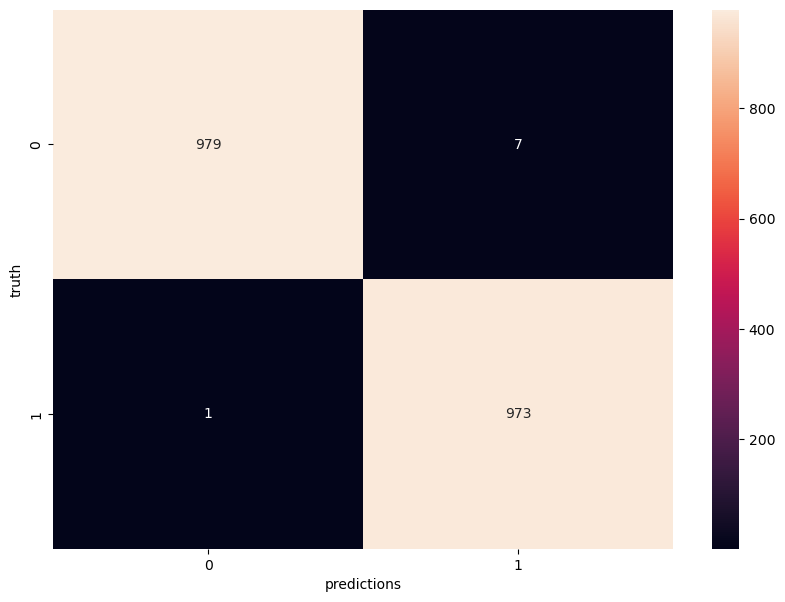

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d' )
plt.xlabel('predictions')
plt.ylabel('truth')